# Computation
***

Computation is a branch of computer science that explores types of problems where solution can be created using Computers, commonly when a computer comes to mind, its is though of as a physical machine, but it can be anything that can do computation, these were abstract machines before the dawn of modern computing.

A computer is something that can do computations automatically, the theory of automation is called automata.

***
## 1. Growth Rate and Notation

It is important to understand the difference between linear and polynomial growth when discussing the complexity of algorithms. Quantum computers are able to handle more complex problems with greater ease.

Growth rate notations are a way to measure the complexity of an algorithm by comparing the input size to the resources needed to compute it. The Big O notation is the most commonly used, as it represents the worst-case scenario and is useful for determining the efficiency of an algorithm.

The Big O (Big Oh) function represents an upper bound on the function in question, meaning that if you pass an input $n$ to the function, the Big O function output must be more than or equal to the output of the function function in question.

The Big Omega (Big $\Omega$) function represents a lower bound on the original function, meaning that if you pass an input $n$ to the function, the Big Omega function output must be less than or equal to the output of the function in question.

The Big Theta (Big $\Theta$) function represents a tight bound, meaning the worst case scenario is also the best case, so if you pass $n$ to the Big Theta function, the output must be equal to the output of the function in question.

***
### Exercise 1
Describe and plot five examples of pairs of functions $f$ and $g$ such that $f$ is $O(g)$.

1. $f(n): n$ and $g(n): n / 4$<br>
$f(n)$ is a linear function and $g(n)$ is also a linear function with a lower growth rate.

2. $f(n): n^2$ and $g(n): log(n)$<br>
$f(n)$ is polynomial and $g(n)$ is a logarithm.

3. $f(n): n^2$ and $g(n): n$<br>
$f(n)$ is polynomial and $g(n)$ is linear function.

4. $f(n): n^3$ and $g(n): n^2$<br>
$f(n)$ is polynomial of degree 3 and $g(n)$ is polynominal of degree 2.

5. $f(n): n!$ and $g(n): n^9$<br>
$f(n)$ is factorial and $g(n)$ is a polynomial of degree 9.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def factorial(n_array):
    """ Calculates the factorial for each value in the n_array """
    n_array = n_array.copy()
    for i in range(len(n_array)):
        n_array[i] = math.factorial(int(n_array[i]))
    return n_array

def log(n_array):
    """ Calculates the logarithm for each value in the n_array """
    n_array = n_array.copy()
    np.log(n_array)
    return n_array

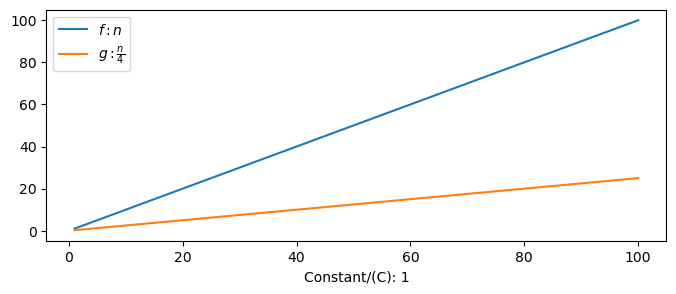

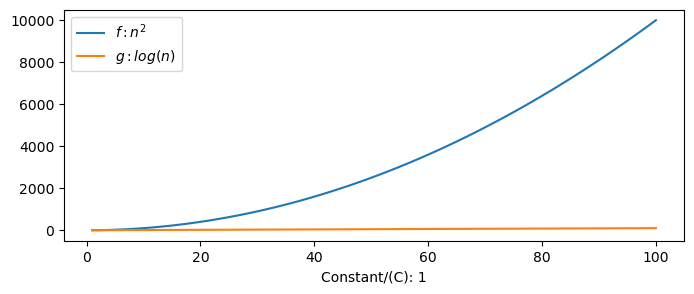

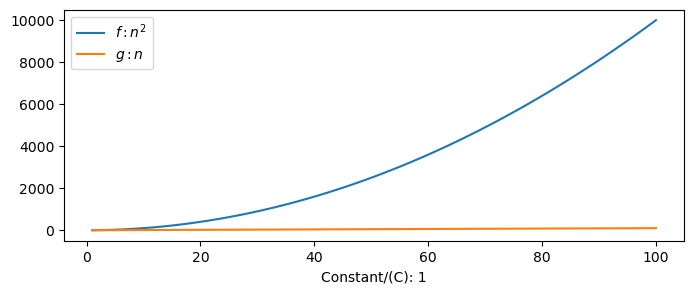

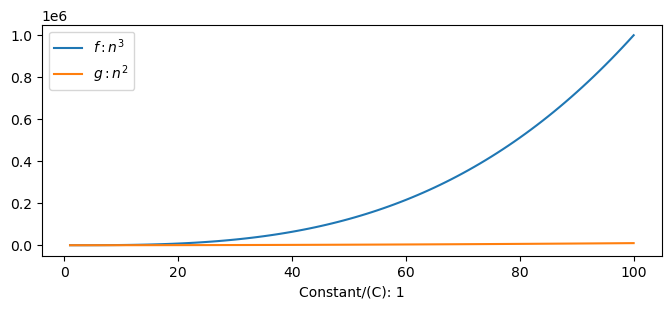

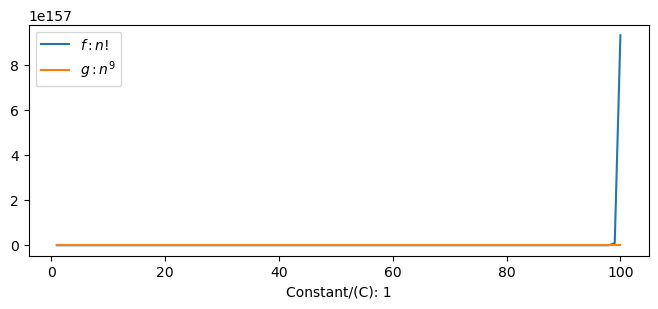

In [2]:
func_pair_list = [
    {
        "func_f": lambda n: n, "func_g": lambda n: n / 4,
        "func_f_label": r"$f: n$","func_g_label": r"$g: \frac{n}{4}$"
    },
    {
        "func_f": lambda n: n ** 2, "func_g": lambda n: log(n),
        "func_f_label": "$f: n^2$", "func_g_label": "$g: log(n)$"
    },
    {
        "func_f": lambda n: n ** 2, "func_g": lambda n: n,
        "func_f_label": "$f: n^2$", "func_g_label": "$g: n$"
    },
    {
        "func_f": lambda n: n ** 3, "func_g": lambda n: n ** 2,
        "func_f_label": "$f: n^3$", "func_g_label": "$g: n^2$"
    },
    {
        "func_f": lambda n: factorial(n), "func_g": lambda n: n ** 2,
        "func_f_label": "$f: n!$", "func_g_label": "$g: n^9$"
    }
]

for plot_i in range(len(func_pair_list)):
    fig, ax = plt.subplots(figsize=(8, 3))
    
    n = np.linspace(1, 100, 100)
    
    func_f, func_g = func_pair_list[plot_i]["func_f"], func_pair_list[plot_i]["func_g"]
    func_f_label = func_pair_list[plot_i]["func_f_label"]
    func_g_label = func_pair_list[plot_i]["func_g_label"]
    constant_c = 1

    ax.plot(n, func_f(n), label=func_f_label)
    ax.plot(n, func_g(n) * constant_c, label=func_g_label)
    ax.set_xlabel("Constant/(C): " + str(constant_c))
    
    ax.legend()
    plt.show()

***
## 2. Turing Machine

The Turing machine is model of computation introduced by Alan Turing that describes an abstract machine.

It has three main components: **ticker-tape**, **tape head** and **state table**.

1. Ticker-tape

The ticker-tape holds the input, output, and memory during execution. It consists of a number of cells, each containing a symbol (which can be any character, not just alphanumeric).

2. Tape head

The tape head is the cell currently being read. After an operation is performed, the tape head can move either left or right.

3. State table

The table lists all the possible states of the machine and specifies the movement of the tape head (either left or right) and the next symbol for the current state.

The python code below is derived from Ian McLoughlins, 03-computation.ipynb notebook, it implements a Turing machine.

I have turned it into a function to allow for reuse, and added some test cases, it currently returns **True** if a input contains all zeros, else returns **False**.

In [3]:
def run_turing_machine(tape, state, table, debug_messages=False):
    pos = 0 # Position on tape.
    
    # Keep going while we are not in a halting state.
    while state not in ['T', 'F']:
        # Print the current status.
        if debug_messages == True:
            print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
        # Get the row of the table.
        row = table[(state, tape[pos])]
        # Overwrite the symbol.
        tape[pos] = row[0]
        # Move left or right.
        if row[1] == 'R':
            # Put blanks on tape as necessary.
            if pos == len(tape) - 1:
                tape += ['_']
            # Increase position.
            pos += 1
        else:
            # Put blanks on tape as necessary.
            if pos == 0:
                tape = ['_'] + tape
                # The position on the tape has to move with it.
                pos += 1
            # Decrease position.
            pos -= 1
        # Update the state.
        state = row[2]

    # Print the current status.
    if debug_messages == True:
        print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
        
    return tape, state

### Exercise 2
Check if input contains all zeros

In [4]:
def contain_all_zero(tape):
    # State table.
    state_table = {
        ('X', '_'): ['_', 'R', 'T'],
        ('X', '0'): ['0', 'R', 'X'],
        ('X', '1'): ['1', 'R', 'Y'],
        ('Y', '_'): ['_', 'R', 'F'],
        ('Y', '0'): ['0', 'R', 'Y'],
        ('Y', '1'): ['1', 'R', 'Y'],
    }

    return run_turing_machine(tape, 'X', state_table, False)[1] == 'T'

In [5]:
# Tape input.
tape = list('0101111')
contain_all_zero(tape)

test_cases = [
    (list("0101111"), False),
    (list("1111111"), False),
    (list("1101110"), False),
    (list("0000000"), True)
]

print("Contain all zeros")
for test in test_cases:
    print(''.join(test[0]), contain_all_zero(test[0]))

all_tests_pass = all([contain_all_zero(test[0]) == test[1] for test in test_cases])
if all_tests_pass: print("All tests pass")

Contain all zeros
0101111 False
1111111 False
1101110 False
0000000 True
All tests pass


### Unary addition

In [6]:
def addition(x, y, debug_messages=False):
    tape = ("1" * x) + "+" + ("1" * y)
    
    state_table = {
        ('X', '1'): ['=', 'R', 'Y'],
        ('Y', '1'): ['1', 'R', 'Y'],
        ('Y', '+'): ['1', 'R', 'Y'],
        ('Y', '_'): ['_', 'R', 'F']
    }
    
    output = run_turing_machine(list(tape), 'X', state_table, False)[0]
    output = ''.join(output)[1:-2]
    return len(output)

In [7]:
import random

print("addition(100, 99) = ", addition(100, 99))

all_tests_pass = True
for i in range(10):
    i = random.randint(0, 1000)
    j = random.randint(0, 1000)
    
    if addition(i, j) != (i + j):
        all_tests_pass = False
if all_tests_pass: print("All tests pass")

addition(100, 99) =  199
All tests pass


***
## 3. Bit Twiddling

Memory on computers is organized into bytes and is highly optimized for this purpose. To speed up computations, processors often use lookup tables. Manipulating individual bits is costly because of the way memory is indexed and optimized.

In [8]:
def to_upper(s):
    # Using a bit mask you can convert any ASCII char to its upper case version
    # This is possible because in ASCII the upper case equivilent
    # Is only different by one bit
    return ''.join([chr(ord(ch) & 0b1011111) for ch in s])

def to_lower(s):
    # Doing the same as above, but adding the bit that
    # differentiates lower from uppercase (1 << 5)
    return ''.join([chr(ord(ch) | (ord('a') - ord('A'))) for ch in s])

def multiply_by_two(x):
    # Since computers store data in bits
    # Shifting to the left will move each bit power to the next number
    # And multiply it by two
    return x << 1

print(to_upper("Hello"))
print(to_lower("HELlo"))
print("multiply_by_two(100) = ", multiply_by_two(100))

HELLO
hello
multiply_by_two(100) =  200


***
## 4. Complex Numbers

Understanding complex numbers is an important prerequisite before going into the next two topics, which are the Fourier transform and quantum computing, so I have included it in this notebook.

Complex numbers are two-dimensional, meaning there are two parts: a real and an imaginary.
The name "imaginary" can be misleading, as it is just as important as the real part.

In mathematics, the $\sqrt{-1}$ is not defined, which makes it difficult to work with.
To overcome this problem, complex numbers were proposed, which allows $\sqrt{-1}$ to be represented as $i$, allowing you to continue with your calculations, even with this problematic number.

The $i$ can be reverted back to $-1$ if your square it ($i^2$), by the end of your calculation, you may no longer have any complex numbers present.

### Complex Number Arithemtic

This is an example of how to represent and manipulate complex numbers in Python without the built-in complex type.

But this is not needed at all, because Python natively supports complex numbers, unlike JavaScript, which does not have it built-in and requires you to implement it yourself or use a library.

In [9]:
def add_complex_nums(x, y):
    """ Add complex numbers x and y """
    return tuple([(x[i] + y[i]) for i in range(len(x))])

def mul_complex_nums(x, y):
    """ Multiply complex numbers x and y
    using the complex number multiplication formulae """
    a1, b1 = x
    a2, b2 = y
    return (a1 * a2 - b1 * b2, a1 * b2 + b1 * a2)

In this example, the complex numbers are represented as tuples, with the real part at index 0 and the imaginary part at index 1.

In [10]:
complex_num1, complex_num2 = (3, 5), (-2, 7)

sum_of_complex_nums = add_complex_nums(complex_num1, complex_num2)
print(f"The sum of the two numbers is: {sum_of_complex_nums}")

product_of_complex_nums = mul_complex_nums(complex_num1, complex_num2)
print(f"The product of the two numbers is: {product_of_complex_nums}")

The sum of the two numbers is: (1, 12)
The product of the two numbers is: (-41, 11)


#### Making a Complex Datatype

In [11]:
# In python complex numbers are abstracted into a class
# There is methods overriding the arithmetic operations
class Complex:
    def __init__(self, a, b):
        """ Initialise the Complex number object with
        a real part A, and imaginary B"""
        self.a, self.b = a, b
        
    def __add__(self, other):
        return Complex(self.a + other.a, self.b + other.b)
    
    def __mul__(self, other):
        return Complex(self.a * other.a - self.b * other.b,
                self.a * other.b + self.b * other.a)
    
    def __str__(self):
        return f"Complex({self.a}, {self.b})"
    
print(f"Complex(3, 5j) * Complex(-2, 7j): {Complex(3, 5) * Complex(-2, 7)}")
print(f"(3 + 5j) * (-2 + 7j): {(3 + 5j) * (-2 + 7j)}")

Complex(3, 5j) * Complex(-2, 7j): Complex(-41, 11)
(3 + 5j) * (-2 + 7j): (-41+11j)


## References
* https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/03-computation.ipynb<br>
* https://en.wikipedia.org/wiki/Theory_of_computation<br>
* https://www.geeksforgeeks.org/difference-between-big-oh-big-omega-and-big-theta/<br>
* https://www.youtube.com/watch?v=0D7yInuKvKs<br>
* https://introcs.cs.princeton.edu/java/52turing<br>
* https://en.wikipedia.org/wiki/Turing_machine